# The active wokspace

There is always an active Workspace. When **maelzel.core** is imported a new Workspace is created, which can be retrieved via `getWorkspace`

In [15]:
from maelzel.core import *
from IPython.display import display

w = getWorkspace()
w

Workspace(scorestruct=ScoreStruct(tempo=96, timesig=(3, 4)), config={}, dynamicCurve=DynamicCurve(shape=expon(0.3), mindb=-60.0, maxdb=0.0))

Alternatively the active workspace can be accessed via the `active` class variable, as `Workspace.active`

In [9]:
w is Workspace.active

True

The active workspace contains the working environment. The most important attributes encapsulated here are the score structure (`.scorestruct`) and the core configuration (`.config`)  


Each new `Workspace` contains a basic `ScoreStruct` (4/4, quarter=60) and a copy of the root config

In [24]:
w.scorestruct

Meas. Index,Timesig,Tempo (quarter note),Label,Rehearsal,Barline
0,4/4,60,,,
...,,,,,


In [25]:
w.config

Key,Value,Type,Descr
A4,442,between 10 - 10000,"Freq. of the Kammerton A4. Normal values are 440, 442, 443 or 432 for old tuning, but any 'fantasy' value can be used"
chordAdjustGain,True,type: bool,"Adjust the gain of a chord according to the number of notes, to prevent clipping"
dynamicCurveDynamics,ppp pp p mp mf f ff fff,type: str,"Possible dynamic steps. A string with all dynamic steps, sorted from softest to loudest"
dynamicCurveMaxdb,0,between -160 - 0,The amplitude (in dB) corresponding to the loudest dynamic
dynamicCurveMindb,-60,between -160 - 0,The amplitude (in dB) corresponding to the softest dynamic
dynamicCurveShape,expon(0.3),type: str,"The shape used to create the default dynamics curve. The most convenient shape is some variation of an exponential, given as expon(exp), where exp is the exponential used. exp < 1 will result in more resolution for soft dynamics"
enharmonic.horizontalWeight,1,type: int,The weight of the horizontal dimension (note sequences) when evaluating an enharmonic variant
enharmonic.verticalWeight,0.01,type: float,The weight of the vertical dimension (chords within a voice) when evaluating an enharmonic variant
fixStringNotenames,False,type: bool,"If True, pitches given as string notenames are fixed at the spelling given at creation. Otherwise pitches might be respelled to match their context for better readability. Pitches given as midi notes or frequencies are always respelled"
htmlTheme,light,"{dark, light}",Theme used when displaying html inside jupyter


## Modifying the active Workspace vs creating a new Workspace

If you are not planning on working on multiple scores simultaneously, the most convenient way to setup your own score structure or to customize the configuration is to **modify the active workspace**. For example, the score structure can be set via `setScoreStruct`


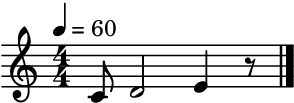

OfflineRenderer(sr=44100)
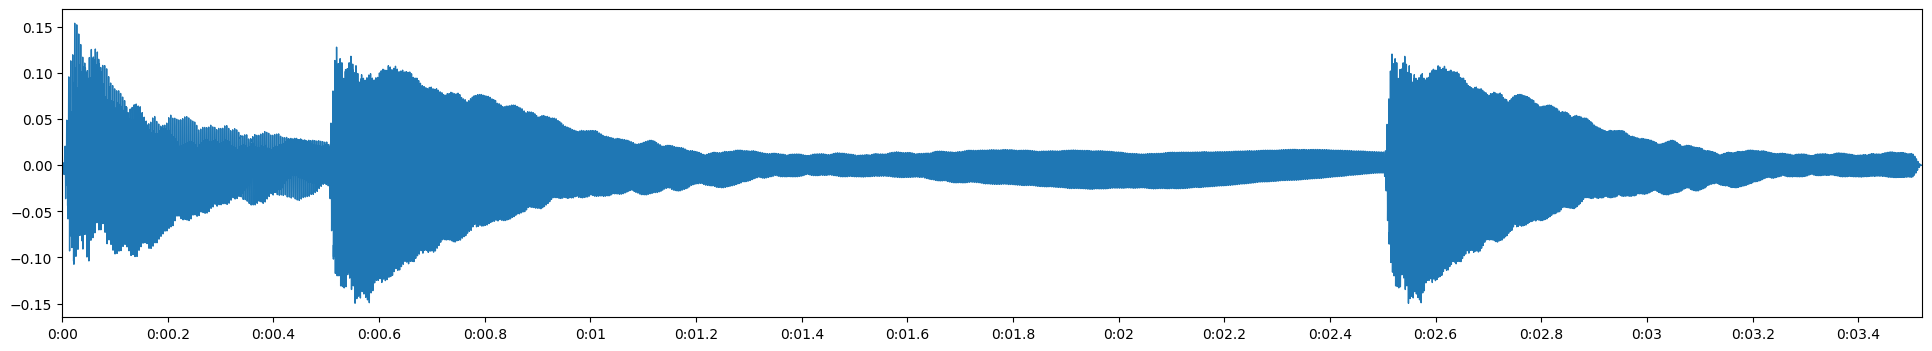

In [17]:
# Reset the scorestruct to the default
setScoreStruct()

chain = Chain(r"""
    4C:0.5
    4D:2
    4E:1
""")
chain.show()
chain.rec(nchnls=1, instr='piano')

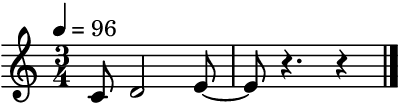

OfflineRenderer(sr=44100)
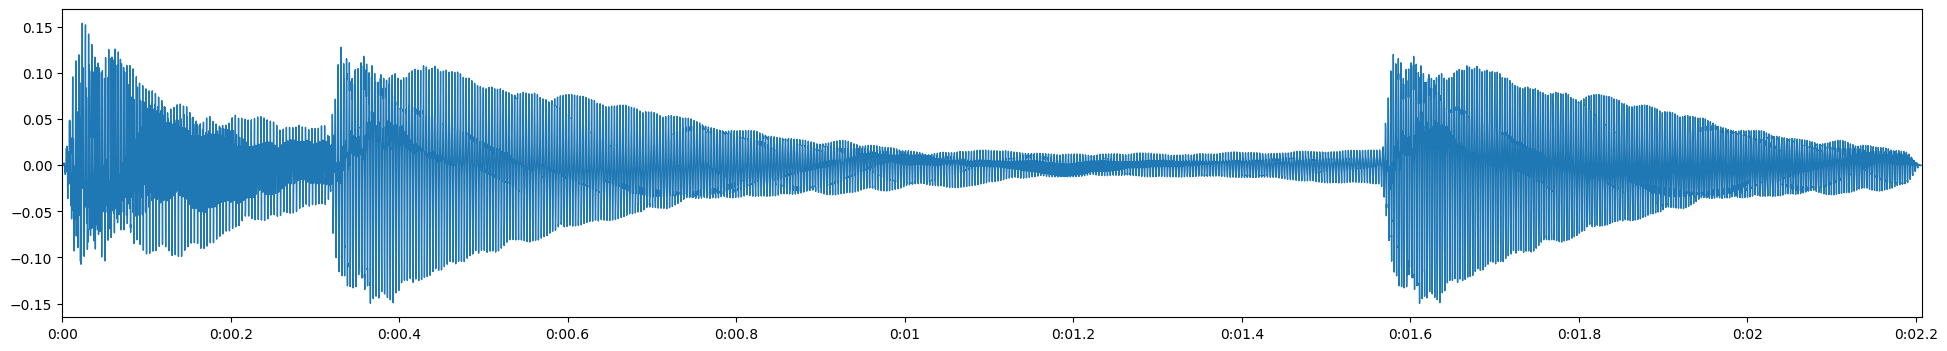

In [11]:
setScoreStruct(timesig=(3, 4), tempo=96)
chain.show()
chain.rec(nchnls=1, instr='piano')


Or you can create an independent Workspace with its own scorestruct:

Chain([4C:0.5♩, 4D:2♩, 4E:1♩])
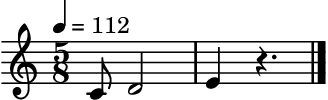

In [12]:
w = Workspace(scorestruct=ScoreStruct(timesig=(5, 8), tempo=112), active=True)
chain

Deactivating the active Workspace activates the previous workspace (there should always be an active Workspace)

Chain([4C:0.5♩, 4D:2♩, 4E:1♩])
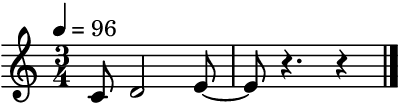

In [13]:
w.deactivate()
chain

As a side note, if you just want to test something under a different scorestruct, you can do use a `ScoreStruct` as a **context manager**. This clones the active Workspace with the given `ScoreStruct` and activates this newly created Workspace, to deactivate it when to context is exited.

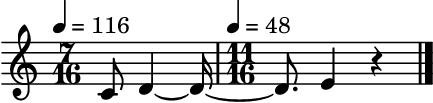

OfflineRenderer(sr=44100)
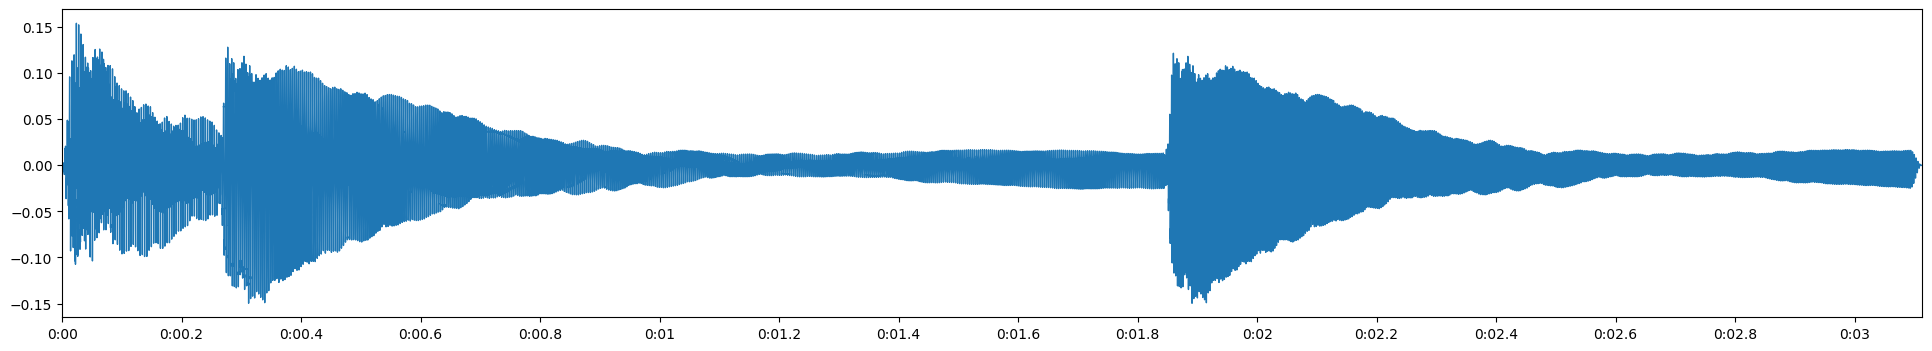

In [18]:
with ScoreStruct(r'''
    7/16, 116
    11/16, 48
'''):
    chain.show()
    display(chain.rec(nchnls=1, instr='piano'))


The same is valid for the configuration. You can modify the active Workspace by changing its config, either via `setConfig` or by directly assigning to `.config`:

Chain([4C+15:1♩, 4Eb-19:0.5♩, 3B+:1.5♩])
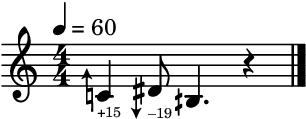

In [21]:
setScoreStruct()

chain = Chain(r'''
  C4+15:1
  4Eb-19:0.5
  3B+:1.5
''')
chain

Chain([4C+15:1♩, 4Eb-19:0.5♩, 3B+:1.5♩])
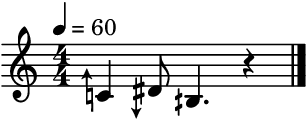

In [22]:
config = CoreConfig()
config['show.centsDeviationAsTextAnnotation'] = False

setConfig(config)   # This is the same as calling `config.activate()`
chain

Reset the config to the root config

Chain([4C+15:1♩, 4Eb-19:0.5♩, 3B+:1.5♩])
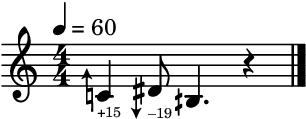

In [23]:
CoreConfig.root.activate()
chain